# Deep Learning with Pytorch


## Tensors

Tensors are the base datastructures in Pytorch. A `Tensor` is an n-dimensional array, similar to NumPy `ndarray`s, but with support for:
- running on specialized hardware such as GPUs or other accelerators
- automatic differentiation when using `Tensor`s in operations

The Tensor API is also very similar to using `ndarray`. You can also easily convert NumPy `ndarray`s to `Tensor`s and vice versa.

Tensors can be initialized directly from data, from NumPy arrays, from another tensor or with random or constant values.

In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt


# from data
data = [[1, 2], [3, 4]]
t1 = torch.tensor(data)
print(t1)

# from NumPy array
np_array = np.array(data)
t2 = torch.from_numpy(np_array)
print(t2)

# from other Tensor shape
t3 = torch.ones_like(t2)
t4 = torch.rand_like(t1, dtype=torch.float)
print(t3, t3.dtype)
print(t4, t4.dtype)

# from shape
t5 = torch.ones((2, 3))
t6 = torch.zeros((3, 2))
t7 = torch.randn((3, 3))
print(t5, t5.shape)
print(t6, t6.shape)
print(t7, t7.shape)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 1],
        [1, 1]]) torch.int64
tensor([[0.3072, 0.2779],
        [0.8267, 0.0041]]) torch.float32
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.]]) torch.Size([3, 2])
tensor([[-0.1146,  1.6407,  0.4297],
        [ 2.0481, -0.9743,  0.1346],
        [ 0.3979,  0.3448, -0.6865]]) torch.Size([3, 3])


PyTorch includes over 100 tensor operations, such as transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, etc. A comprehensive list is described [here](https://pytorch.org/docs/stable/torch.html). All operations can also run on the GPU when available (and the correct CUDA drivers installed). Tensors can be moved to an other device using the `to()` method.

In [2]:
if torch.cuda.is_available():
    t1 = t1.to('cuda')
    print(t1.device)
    t1 = t1.to('cpu')
    print(t1.device)

cuda:0
cpu


The Tensor API is very similar to the NumPy API, with identical slicing and indexing. Convert a Numpy array to Tensor with `tensor = torch.from_numpy(arr)`, and vice versa with `arr = tensor.numpy()`. Both `tensor` and `arr` will be backed by the same memory, so changing one will affect the other as well. When running operations on the GPU or CPU, make sure that all involved `Tensor`s are on the correct device.

### Assignment 1

Perform the following operations:

- Create a 4x4 Tensor tensor1 filled with samples from a Gaussian with mean 0.5 and standard deviation 2.
    
- Multiply the upper left 2x2 of tensor1 component-wise with $[[2, 3], [4, 5]]$.
    
- Calculate tensor2 as the matrix multiplication of tensor1 and $[1, 2, 3, 4]$.
    
- Calculate *on the GPU* tensor3 as the matrix multiplication of tensor1 and the column vector $[4, 3, 2, 1]^T$.
    
- Concatenate tensor2 and tensor3 into a vector of shape (8,).
    
- Print the average, min and max value of this vector.

In [3]:
tensor1 = torch.randn(4, 4) * 2 + 0.5
tensor1[:2,:2] *= torch.tensor([[2,3],[4,5]])
tensor2 = torch.matmul(tensor1, torch.tensor([1.0,2.0,3.0,4.0]))
tensor3 = torch.matmul(tensor1.cuda(), torch.tensor([4.0,3.0,2.0,1.0]).cuda())
vector = torch.cat((tensor2.cpu(), tensor3.cpu()))
print(f'Average: {vector.mean()}, Min: {vector.min()}, Max: {vector.max()}')

Average: -0.7077131271362305, Min: -26.64603042602539, Max: 18.121334075927734


## Datasets

PyTorch uses the [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) abstract class to represent a dataset. Datasets typically take a `transform` argument at construction, which allows to define extra preprocessing transformations on the raw data. This can be combined with  [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which provides a Python iterable over a dataset with support for automatic batching, shuffling and multi-process data loading.

For vision datasets in particular, Pytorch provides the [`torchvision`](https://pytorch.org/docs/stable/torchvision/index.html) package, which contains popular datasets, common image transformations and pretrained model architectures. Common image transformations are used to convert from a raw image format into a `Tensor`, to take random crops, add color jitter, etc. Transforms can be composed together using the [`torchvision.transforms.Compose`](https://pytorch.org/docs/stable/torchvision/transforms.html#torchvision.transforms.Compose) transform. Common image datasets such as ImageNet, CIFAR and MNIST are readily available from [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html).  

Also some utilities to save images are provided in the [`torchvision.utils`](https://pytorch.org/docs/stable/torchvision/utils.html) package. Note that Pytorch uses the `[Channels x Height x Width]` dimension order for representing images, in contrast to for example NumPy and matplotlib, that use the `[Height x Width x Channels]` layout. Keep this in mind when plotting images represented as Tensors.

### Assignment 2

The MNIST dataset contains 28x28 binary images of handwritten digits. It is often used in machine learning as a toy dataset to build a proof of principle for novel techniques. Througout the lab sessions we will also use this dataset to illustrate many of the models introduced during the course.

Load the MNIST train set and use the transforms to pad to a 32x32 image, convert to a `Tensor` and renormalize the values between `[-1, 1]` instead of `[0, 1]`. Use a `DataLoader` to get a random batch of 16 items and plot these in a 4x4 grid, and print the corresponding labels as a 4x4 matrix.

tensor([[2, 8, 8, 1],
        [4, 7, 6, 7],
        [5, 4, 6, 1],
        [7, 8, 4, 5]])


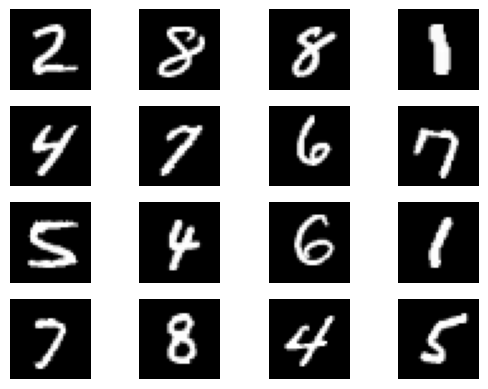

In [21]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# Changed the structure of the code because did not know how to make it work if transform is used after creating the mnist object
mnist = torchvision.datasets.MNIST(root='./data', download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(mnist, batch_size=16, shuffle=True)
dataiter = iter(trainloader)
images, labels = next(dataiter)

fig, axs = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(images[i*4+j].squeeze(), cmap='gray')
        axs[i,j].axis('off')

print(labels.view(4,4))
plt.show()

## Custom datasets

You can also create custom datasets by implementing your own [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class. Only two methods need to be implemented:

- `__len__` so that `len(dataset)` returns the size of the dataset
- `__getitem__` to support indexing such that `dataset[i]` returns the _i_th element


### Assignment 3

Create a custom Pytorch dataset `MoonDataset` using [the moons data from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html). The dataset returns a tuple `(sample, label)` where `sample` is the 2D tensor of the x and y coordinate, and `label` is the label 0 or 1. The size of the dataset should be 1000. Also add some Gaussian noise with standard deviation 0.1 to the samples.

Using this dataset, create a DataLoader that samples a random batch of 100 points and plots these in an XY grid (red for label 0, blue for label 1).

tensor([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1])


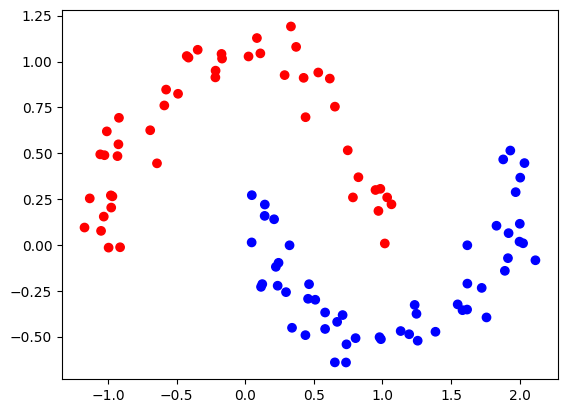

In [24]:
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

class MoonDataset(Dataset):
    def __init__(self, n_samples=1000, noise=0.1):
        X, y = make_moons(n_samples=n_samples, noise=noise)
        self.samples = torch.tensor(X)
        self.labels = torch.tensor(y)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.samples[idx], self.labels[idx]

dataset = MoonDataset()

dataloader = DataLoader(dataset, batch_size=100, shuffle=True)
dataiter = iter(dataloader)
samples, labels = next(dataiter)

print(labels)
cmap = ListedColormap(["red", "blue"])
plt.scatter(samples[:,0], samples[:,1], c=labels, cmap=cmap)
plt.show()

## Neural networks

Neural networks in Pytorch are defined as [`torch.nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module)s. A `Module` is the basic building block of a neural network, but can also be composed of different other `Module`s. This way, complex models can be built. To implement your custom `Module`, extend this class and implement the `forward()` method. This function takes the input `Tensor` as argument, and returns the resulting Tensor after processing. The `forward()` method is also called from `__call__`, allowing you to have module instance to behave as a function.

`Module` also provides the following methods:
- `parameters()` returns an iterator over the trainable parameters. This is typically provided to an optimizer.
- `state_dict()` returns a dictionary containing the whole state of the module. Use this to persist your model after training.
- `load_state_dict(dict)` loads a state dictionary. Use this to load a model that you persisted earlier.
- `to(device)` puts the module on a device. For example use `to("cuda")` to deploy your model on a GPU.
- `backward()` backpropagates gradients from the output to the input and accumulates the gradients w.r.t. the parameters.
- `zero_grad()` sets the parameter gradients back to zero.
- `eval() / train()` sets the model in eval or train mode. Some modules behave differently depending on this mode.

By default, modules that are instantiated as class members, will automatically be added as children to your module. For example, the parameters of the child modules will also show up in `parameters()`. 

The [`torch.nn`](https://pytorch.org/docs/stable/nn.html) package contains a lot of basic building blocks for neural networks. These can be instantiated as `Module`s, but typically also have a functional counterpart defined in [`torch.nn.functional`](https://pytorch.org/docs/stable/nn.functional.html).

For example, a simple fully connected neural network with a single hidden layer can be defined as: 

In [25]:
from torch.nn import Linear
from torch.nn.functional import relu

class Perceptron(torch.nn.Module):
    
    def __init__(self, num_inputs, num_hidden, num_outputs):
        torch.nn.Module.__init__(self)
        self.linear1 = Linear(num_inputs, num_hidden)
        self.linear2 = Linear(num_hidden, num_outputs)
        
    def forward(self, x):
        h = relu(self.linear1(x))
        y = self.linear2(h)
        return y


When forwarding data through a `Module`, it always expects the first dimension to be the batch dimension. When forwarding a single item, you'll need to add a batch dimension, e.g. by `unsqueeze(0)`. So for example, we can instantiate this model to process 32x32 pixels into 10 outputs to process digits from the MNIST dataset:

In [26]:
model = Perceptron(32*32, 100, 10)
inputs = torch.zeros((32*32))
outputs = model(inputs.unsqueeze(0))
print(outputs)

tensor([[-0.0722,  0.0379,  0.0830, -0.0257, -0.0733, -0.0091, -0.0123, -0.0371,
          0.0722,  0.0020]], grad_fn=<AddmmBackward0>)


### Assignment 4

One of the earliest convolutional neural networks was [LeNet](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). We will build a `LeNet` class that resembles the LeNet-5 architecture, but with a few updates to latest standards.
![LeNet](https://paperswithcode.com/media/methods/LeNet_Original_Image_48T74Lc.jpg)

The model should be composed of 4 convolutional layers and 3 fully connected layers:

- `C1` consists of 6 filters of 5x5, stride 1.
- `S2` acts as a downsampling layer, using 6 filters of 2x2 and stride 2.
- `C3` performs again a 5x5 convolution, stride 1, but with 16 filters.
- `S4` agains downsamples using 2x2 convolutions.

The fully connected layers have 120, 84 and 10 outputs respectively. Instead of `tanh` activations in the original paper, we will use `relu`s after each hidden layer. The model should be able to process 32x32 images, and return 10 logit outputs. Test your model by forwarding the batch of images obtained in Assignment 2.

To calculate the correct dimensionality of the hidden layers after the convolutions, you can use this handy calculator: https://madebyollin.github.io/convnet-calculator

In [27]:
from torch.nn import Conv2d, MaxPool2d
import torch.nn.functional as F


class LeNet(torch.nn.Module):

  def __init__(self):
      torch.nn.Module.__init__(self)
      self.conv1 = Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
      self.pool1 = MaxPool2d(2,2)
      self.conv2 = Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
      self.pool2 = MaxPool2d(2,2)

      self.linear1 = Linear(16*5*5, 120)
      self.linear2 = Linear(120, 84)
      self.linear3 = Linear(84, 10)

  def forward(self, x):
      x = F.relu(self.conv1(x))
      x = self.pool1(x)
      x = F.relu(self.conv2(x))
      x = self.pool2(x)
      x = x.view(-1, 16 * 5 * 5)  #Flatten
      x = F.relu(self.linear1(x))
      x = F.relu(self.linear2(x))
      x = self.linear3(x)
      return x



In [30]:
net = LeNet()
output = net(images)

## Training

To train the neural network, you need two more ingredients: the loss function and the optimizer.

A loss function typically compares your neural network output to a certain target value. A number of loss functions are available as `Module`s in [`torch.nn`](https://pytorch.org/docs/stable/nn.html#loss-functions), but in principle you can implement any operation that works on the output tensor of the model. To backpropagate the gradients, call `backward()` on the loss `Tensor`. This will use the chain rule to calculate the gradients wrt the inputs and the parameters of all `Module`s involved in the computation graph.

The optimizer transforms the raw gradients into an update rule for the parameters. Pytorch provides the [`torch.optim.Optimizer`](https://pytorch.org/docs/stable/optim.html) class, together with implementations of most popular optimization schemes. The `Optimizer` is typically constructed from the model's parameters iterable (i.e. by calling `model.parameters()`), and optimizer-specific configuration. When the gradients are backpropagated, call the `step()` function of the `Optimizer`. This will perform the parameter update for all involved weights. Do not forget to clear the gradients after each step by calling `zero_grad()`, else gradients will keep accumulating.

Putting everything together, a basic training routine looks like this:

```
# initialize dataset
dataset = ...
loader = DataLoader(dataset, ...)

# initialize model
model = ...

# intialize optimizer
optimizer = MyPreferredOptimizer(model.parameters(), ...)

# start training
for epoch in range(num_epochs):
    for i, data in enumerate(loader):
        inputs, labels = data
        
        # zero parameter gradient
        optimizer.zero_grad()
        
        # forward, backward, optimize
        outputs = model(inputs)
        loss = MyLossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
```

### Assignment 5

Train the LeNet model from Assignment 4 for 10-way classification on the MNIST train set. Use the `CrossEntropyLoss` and a basic `SGD` optimizer. It's useful to log the loss values during training to see how the training progresses. Make sure to run everything on GPU to reduce your waiting time :-).

In [37]:
from torch.optim import SGD
import torch.optim as optim
import torch.nn as nn

# initialize model
model = LeNet().cuda()

# intialize optimizer
optimizer = SGD(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

num_epochs = 10
running_loss = 0

# start training
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data

        inputs = inputs.cuda()
        labels = labels.cuda()
        # zero parameter gradient
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = model(inputs).cuda()

        loss = criterion(outputs, labels)
  
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0


[1, 2000] loss: 2.294584609746933
[2, 2000] loss: 4.073395551025867
[3, 2000] loss: 1.2626070861965417
[4, 2000] loss: 0.6272566215237603
[5, 2000] loss: 0.46900721909990534
[6, 2000] loss: 0.371276934592519
[7, 2000] loss: 0.31600204326980746
[8, 2000] loss: 0.2740531959560467
[9, 2000] loss: 0.2395185366856167
[10, 2000] loss: 0.21807051669730573
19.22447551266523


## Testing

In case of a supervised classification task, you typically evaluate performance on a separate test set. For classification, you add a softmax operation after the logits, so these are renormalized and can be used as parameters of a Categorical distribution. You can now count the number of correct classifications by looking at the highest softmax activation.

Although you might want to evaluate only a single sample, Pytorch always requires a batch dimension. So in case of a single sample, the batch dimension will be 1. You can use the `squeeze(0)` and `unsqueeze(0)` methods to remove or add a batch dimension of 1 to your data. Also, the output tensor of the neural network is not just a datastructure containing the data. It also keeps information from the whole compute graph (i.e. this is how Pytorch can backpropagate gradients for you). Therefore, if you want to process the outputs of a neural network again as a numpy array in an other library, make sure to first call `detach()` to detach it from the compute graph, and optionally `cpu()` to move it to CPU memory before you can call `numpy()`.

In evaluation mode, you don't need to backpropagate any gradients, and Pytorch hence does not need to do all the bookkeeping of tracking the computation graph and keeping intermediate gradients. A convenient way to avoid this overhead is by wrapping your evaluation code in a `with torch.no_grad():` statement.

### Assignment 6

Create a dataset for the MNIST test set. Load a single image sample and forward it through the neural network. Visualize a bar chart of the softmax'ed output together with the input image to check the performance qualitatively.

In [45]:
transform = transforms.Compose([ transforms.Pad(2),transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=1, shuffle=True)

image, label = next(dataiter)
image = image.float().unsqueeze(0).cuda()

print(image.shape)

output = model(image)
prob = torch.softmax(output, dim=1)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(image.squeeze().cpu(), cmap='gray')
axs[0].axis('off')
axs[1].bar(range(10), prob.squeeze().cpu().detach().numpy())
plt.show()

torch.Size([1, 100, 2])


RuntimeError: ignored

To quantitatively evaluate the model, now forward all test data through the neural network. Count the number of correct classifications to assess the accuracy of your model. You should be able to reach a classification accuracy of well over 90%.

In [47]:
transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=16, shuffle=False)

total = 0
correct = 0

for data in testloader:
    inputs, labels = data
    inputs = inputs.cuda()
    labels = labels.cuda()

    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 0.9707


## Scaling up experiments

When you want to solve a new problem with deep learning, you will have to experiment with different model architectures and hyper parameters. In this case, having a good and systematic experimentation workflow will help you.

### Saving and loading models

In the previous assignments, you probably trained the neural network, and then immediately tested the performance with the trained model still in memory. However, if you shut down the notebook, or revisit it later, you might have to do the training again. For this simple example, training is a breeze, but for larger experiments, training can take hours, days or even [weeks](https://deepmind.com/blog/article/alphago-zero-starting-scratch). In this case, you might want to store the final model, as well as intermediate checkpoints during training.

To store a model, you basically need to store all the weights, which you can iterate using the `parameters()` function used earlier. However, to store and load the parameters, Pytorch also provides access to the `state_dict`, which basically maps all parameters of the model layers to keys in a dictionary. Pytorch also provides methods to save or load a `state_dict` to or from file.

To save model parameters, use the `torch.save()` function with a file name and a `state_dict`, returned by `nn.Module`'s `state_dict()` method:

```
torch.save(model.state_dict(), PATH)
```

To load model parameters, use the `torch.load()` function with a file name to load the `state_dict`, and `nn.Module`'s `load_state_dict()` function to actually load it into memory:

```
model.load_state_dict(torch.load(PATH))
```

It is important to note that this only stores the parameters, not the model definition. It is up to you to make sure that your model actually corresponds to the parameters you want to load. In principle, you can also use `torch.save(model)` to store the complete model. However, in this case you need to make sure that all used Python classes are available on the PYTHONPATH (in the same version) when loading the model.


### Monitoring progress

During training, you might want to track progress of your experiment. For example, you want to track the loss curve to see whether the training process is converging, or evaluate the performance on a held-out validation set to check whether the model is overfitting. A common tool for tracking and visualizing progress is [TensorBoard](https://www.tensorflow.org/tensorboard), which comes from Google's TensorFlow project. TensorBoard uses a custom log file format to write progress to, and is able to visualize these logs in an interactive web view. Luckily, Pytorch also supports the neccesary bindings to write such log files in the `torch.utils.tensorboard` package.

To write log files, instaniate a `SummaryWriter` object. You can then write data using the `add_xxx` methods provided. For example use `add_scalar(key, value, iteration)` to add a value to a certain plot.

```
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(logdir="logs")

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/validation', np.random.random(), n_iter)
```

To visualize the progress, you need to launch `tensorboard` with the correct `logdir`, i.e. the directory you write your log files to. When running on Google colab, you can easily spawn and see a tensorboard by executing:

```
%load_ext tensorboard
%tensorboard --logdir logs
```

When running inside a jupyter notebook, launch TensorBoard before executing the cell that runs the training procedure, so you can track the progress while the training is running. When running locally on your PC, you can install on your system and launch it as a separate process. You can then typically see the TensorBoard by browsing to `http://localhost:6006`.


### Reproducible experiments

When executing experiments, it is a good practice to make sure that the same experiments yields the same outcomes. However, in deep learning research this is often a pain, as multiple sources of randomness will affect the performance of your model after training. Therefore, it is typically required to rerun the same experiment multiple times and report the average performance.

You can also try to limit the sources of randomness, for example by fixing the random seed of the random generators. Fix the random seed of all libraries that can attribute to randomness, i.e. typically `torch` and `numpy`. Numpy provides the `seed()` method in the `random` package, whereas `torch` provides the `manual_seed()` function.

```
import torch
import numpy as np
torch.manual_seed(7777)
np.random.seed(7777)
```

Be aware though that this might not be enough. For example, when running on non-deterministic hardware such as GPUs or TPUs, the results might still be different for different training runs!

### Assignment 7

Rewrite the train loop from Assignment 5, but now
- store the weights of your model after each epoch;
- monitor the training loss using TensorBoard;
- split the train set in a train and validation set, and also log the accuracy on the validation set using TensorBoard;
- fix the random seed and check the impact on the results.

__Tip__: look at `torch.utils.data.Subset` for making a train-validation set split.

__Tip 2__: to get the number value of a Tensor that represents a single value, you can use the [`item()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.item) function, which also takes care of the detaching and copying to CPU.

In [48]:
from torch.optim import SGD
import torch.optim as optim
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

transform = transforms.Compose([
    transforms.Pad(2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testloader = DataLoader(trainset, batch_size=16, shuffle=True)

# initialize model
model = LeNet().cuda()

# intialize optimizer
optimizer = SGD(model.parameters(), lr=0.001)

criterion = nn.CrossEntropyLoss()

num_epochs = 10
running_loss = 0

writer = SummaryWriter()

# start training
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader):
        inputs, labels = data

        inputs = inputs.cuda()
        labels = labels.cuda()
        # zero parameter gradient
        optimizer.zero_grad()

        # forward, backward, optimize
        outputs = model(inputs).cuda()

        loss = criterion(outputs, labels)
  
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1}] loss: {running_loss / 2000}')
            running_loss = 0.0
    
    train_loss = running_loss/len(trainloader)
    
    writer.add_scalar('Loss/train', train_loss, epoch)

    torch.save(net.state_dict(), f'lenet_epoch{epoch}.pth')

writer.close()

[1, 2000] loss: 2.2968612335920335
[2, 2000] loss: 4.236953939199448
[3, 2000] loss: 2.286057431291789
[4, 2000] loss: 0.6471002475637943
[5, 2000] loss: 0.4567708900345024
[6, 2000] loss: 0.3551218409803696
[7, 2000] loss: 0.29415063724340873
[8, 2000] loss: 0.25148880523571276
[9, 2000] loss: 0.22199123248294927
[10, 2000] loss: 0.20430245590687263


## Closing remarks

In this Lab session you got to know the basics of Pytorch. Of course there is a lot still to discover. You can definitely find a lot more tutorials on the Internet, and the [Pytorch docs](https://pytorch.org/docs/stable/) is also a good source for documentation.

Developing and testing new deep learning models can be quite a pain, as there are many unknowns and hyperparameters to tune. The effectivity of deep learning research hence boils down to understanding how the information and the gradients flow through your network, trying multiple configurations, being able to herd many experiments, and also just being lucky.

In the next Lab sessions, we will focus on the type of models that interest us most: deep generative models.